<h2>Part A (Supervised learning): </h2>



In recent years, human activity recognition (HAR) has become a hot topic inside the scientific community, as more and more wearable devices enter the  market.  


We will use realistic-focused data (extracted directly from the Android app and the sensors of each smartphone involved) to predict user association with one of the four possible registered activities whether a user is inactive, active, walking, or driving, and perform association with defined movements, in addition to general information extraction. 


The data collected comes from four different independent sensors: accelerometer, gyroscope, magnetometer and GPS; all data is labelled as well.  One element that could be potentially problematic is having to join data from very high-frequency sensors such as the accelerometer, with a low-frequency sensor, such as the GPS unit.  
 

To evaluate these datasets, we will break each dataset into training and testing data, then combine the training sets and the testing sets to have our full set of data to for the model. 


We expect to leverage multiple supervised machine learning algorithms including SVM with different kernels, Random Forest, XGBOOST, as well as leveraging F1 scores for validation of various models. 
As this is a classification problem with multiple targets, we expect to output numerous  multi-class confusion matrices.

We expect to leverage multiple supervised machine learning algorithms including SVM with different kernels, Random Forest, XGBOOST, as well as leveraging F1 scores for validation of various models. 
As this is a classification problem with multiple targets, we expect to output numerous  multi-class confusion matrices.

<h2> Initialization

<h3>Imports

In [1]:
#!conda install -c conda-forge scitime -y
#!conda install -c conda-forge plotly -y
!pip install plotly

In [63]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 1000)
    
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
from matplotlib import offsetbox
import matplotlib.patheffects as PathEffects
%matplotlib inline
    
import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,14)})
# i can change this later

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
    
from scipy.stats import norm, skew, probplot
from scipy.optimize import curve_fit
    
import os
from time import time

from scitime import RuntimeEstimator
  
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#  from sklearn.utils import shuffle 

matplotlib.pyplot:DEBUG:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


<h3>Global Variables

In [3]:
RANDOM_SEED = 42

<h2>Data Loading

<h3>Load CSV into Dataframe

In [4]:
datadfraw = pd.read_csv('D:/Documents/Python/MADS/694/sensoringData_feature_prepared_20_19.0_2.csv')

<h3>Sample of Dataframe

In [5]:
datadfraw.sample(4).T

,401533,455168,465002,386112
id,37087039,10344532,15133667,34563940
user,10,5,5,10
timestamp,1.57666e+09,1.57127e+09,1.57226e+09,1.57659e+09
acc_xs_mean,-0.0180261,-0.0263484,0.171509,-0.211359
acc_ys_mean,-0.017758,0.0335677,-0.927574,0.307131
acc_zs_mean,-0.0259913,0.193952,0.958866,0.396207
acc_xs_var,0.130964,0.0297284,14.4013,0.35736
acc_ys_var,0.0169624,0.00241339,42.2196,0.0935206
acc_zs_var,0.0444323,0.00143295,49.7225,0.112892
acc_xs_mad,0.243956,0.100261,2.31317,0.233418


In [6]:
min(datadfraw['timestamp'])

1570541077.904

In [7]:
max(datadfraw['timestamp'])

1576833393.709

<h3> Prep for Processing

<h4>Removing ID Columns

In [11]:
datadf = datadfraw.drop(['activity_id','user','id','timestamp'],axis=1)
datadf.shape

(499276, 91)

<h4>Extracting Labels

In [12]:
labels = datadf['activity']

In [13]:
labels.unique()

array(['Walking', 'Inactive', 'Active', 'Driving'], dtype=object)

In [14]:
datadf.drop(['activity'],axis=1,inplace=True)

<h4>Dimensionality Reduction

In [37]:
pca = PCA(n_components=2,svd_solver='full')

In [38]:
df_pca = pca.fit_transform(datadf)

In [12]:
print(pca.explained_variance_ratio_)

[0.99738572 0.00238773]


In [31]:
df_pca

array([[-17068.96500923,  -1106.70959673],
       [-17068.9827817 ,  -1108.70454929],
       [-17069.00855975,  -1111.4592405 ],
       ...,
       [-17048.27426834,  -1146.85494134],
       [-17048.57334995,  -1145.96601677],
       [-17048.87597201,  -1145.14373133]])

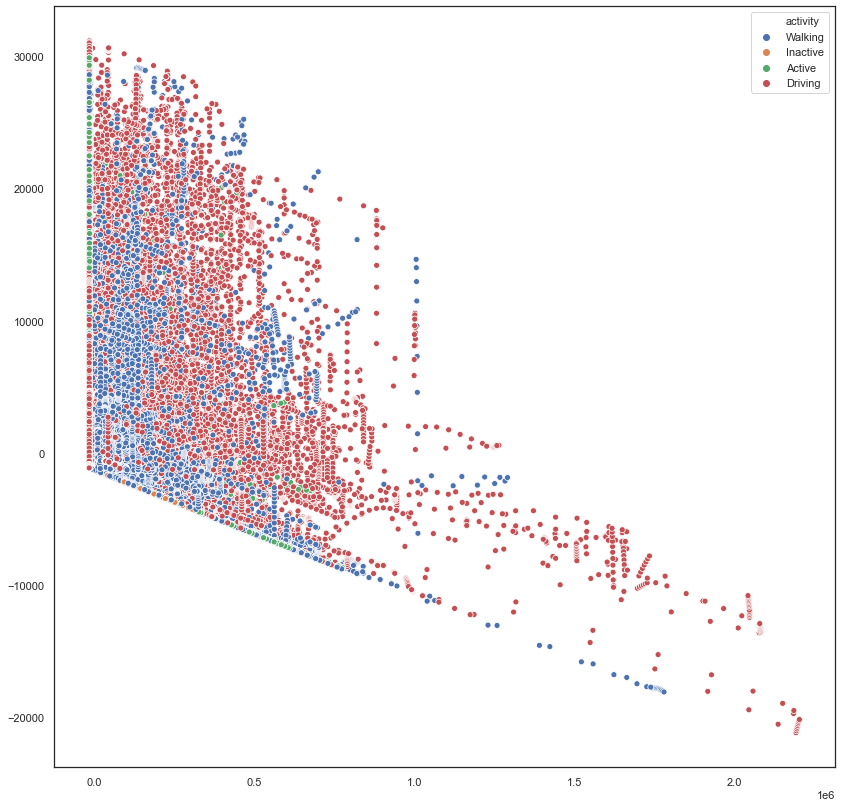

In [42]:
sns.scatterplot(df_pca[:,0],df_pca[:,1],hue=labels)

<h3>TSNE

In [15]:
try:
    X_TSNE = pd.read_csv('D:/Documents/Python/MADS/694/TSNEdf.csv')
except:
    X_TSNE = TSNE(n_components=2,random_state=RANDOM_SEED,n_jobs=4).fit_transform(datadf)
    pd.DataFrame(X_TSNE).to_csv('D:/Documents/Python/MADS/694/TSNEdf.csv',index=False)

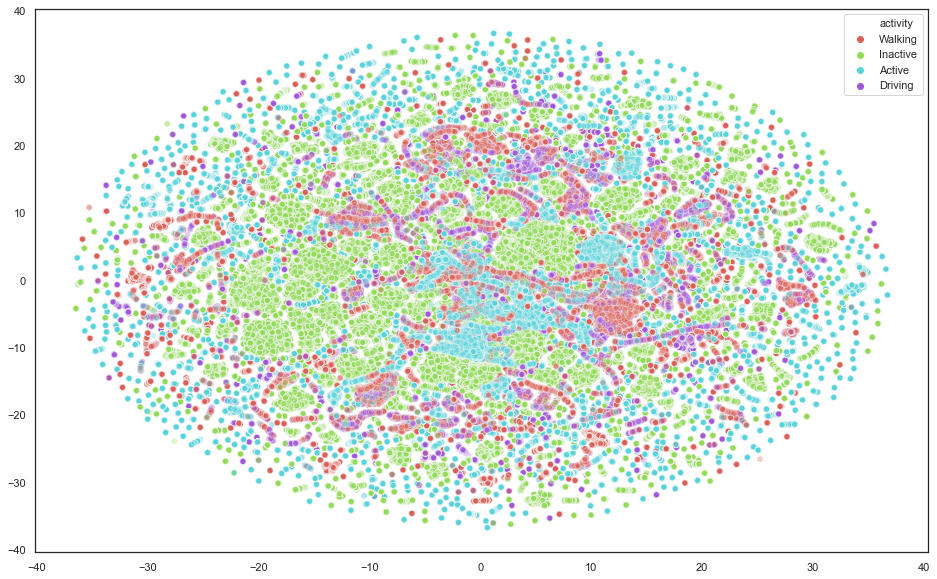

In [16]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=X_TSNE[:,0],
    y=X_TSNE[:,1],
    hue=labels,
    palette=sns.color_palette("hls", 4),
    legend="full",
    alpha=0.3
)

<h4>Train Test Split

In [43]:
PCAX_train, PCAX_test, PCAy_train, PCAy_test = train_test_split(df_pca,labels, test_size=.2, random_state=RANDOM_SEED)
TSNEX_train, TSNEX_test, TSNEy_train, TSNEy_test = train_test_split(X_TSNE,labels, test_size=.2, random_state=RANDOM_SEED)

<h2>Modeling

<h3>Random Forest PCA

In [20]:
rf_model = RandomForestClassifier(random_state=RANDOM_SEED)

In [22]:
rf_model.fit(PCAX_train,PCAy_train)

RandomForestClassifier(random_state=42)

In [23]:
rf_model_preds = rf_model.predict(PCAX_test)

In [24]:
rf_model_accuracy = accuracy_score(PCAy_test,rf_model_preds)

In [25]:
rf_model_accuracy

0.9261035891684025

In [26]:
cf = confusion_matrix(PCAy_test,pd.Series(rf_model_preds),labels=['Active','Driving','Inactive','Walking'])

numexpr.utils:INFO:Note: NumExpr detected 20 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
numexpr.utils:INFO:NumExpr defaulting to 8 threads.
matplotlib.colorbar:DEBUG:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001459291E670>
matplotlib.colorbar:DEBUG:Using auto colorbar locator on colorbar
matplotlib.colorbar:DEBUG:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001459291E670>
matplotlib.colorbar:DEBUG:Setting pcolormesh


matplotlib.font_manager:DEBUG:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
matplotlib.font_manager:DEBUG:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic

matplotlib.font_manager:DEBUG:findfont: score(<Font 'Gill Sans MT Condensed' (GILC____.TTF) normal normal 400 condensed>) = 10.25
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Consolas' (consolab.ttf) normal normal 700 normal>) = 10.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Eras Light ITC' (ERASLGHT.TTF) normal normal light normal>) = 10.24
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Microsoft PhagsPa' (phagspa.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal 700 normal>) = 11.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Harrington' (HARNGTON.TTF) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Perpetua Titling MT' (PERTIBD.TTF) normal normal 700 normal>) = 10.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Goudy Old Style' (GOUDOS.TTF) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: s

matplotlib.font_manager:DEBUG:findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal 700 normal>) = 10.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Microsoft PhagsPa' (phagspab.ttf) normal normal 700 normal>) = 10.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal light normal>) = 10.24
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Calisto MT' (CALISTB.TTF) normal normal 700 normal>) = 10.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Arial' (ARIALNI.TTF) italic normal 400 condensed>) = 1.25
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Microsoft Tai Le' (tail

matplotlib.font_manager:DEBUG:findfont: score(<Font 'Symbol' (symbol.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'ZWAdobeF' (ZWAdobeF.TTF) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Lucida Handwriting' (LHANDW.TTF) italic normal 400 normal>) = 11.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal 700 normal>) = 11.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Cambria' (cambriaz.ttf) italic normal 700 normal>) = 11.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Bodoni MT' (BOD_R.TTF) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal light normal>) = 11.24
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Malgun Gothic' (malgunsl.ttf) normal 

matplotlib.font_manager:DEBUG:findfont: score(<Font 'Lucida Bright' (LBRITED.TTF) normal normal 700 normal>) = 10.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal light normal>) = 10.24
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Garamond' (GARAIT.TTF) italic normal 400 normal>) = 11.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 11.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Perpetua' (PERBI___.TTF) italic normal 700 normal>) = 11.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Courier New' (courbi.ttf) italic normal 700 normal>) = 11.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Microsoft Uighur' (MSUIGHUB.TTF

matplotlib.font_manager:DEBUG:findfont: score(<Font 'Segoe UI Emoji' (seguiemj.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'MV Boli' (mvboli.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Niagara Solid' (NIAGSOL.TTF) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal 700 normal>) = 11.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Papyrus' (PAPYRUS.TTF) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Microsoft JhengHei' (msjhl.ttc) normal normal light normal>) = 10.24
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Georgia' (georgiab.tt

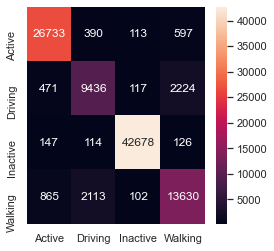

In [27]:
fig, ax = plt.subplots(figsize=(4,4)) 
sns.heatmap(cf,annot=True,fmt='g',ax=ax,xticklabels=['Active','Driving','Inactive','Walking'],yticklabels=['Active','Driving','Inactive','Walking'])

In [28]:
print('\nClassification Report\n')
print(classification_report(PCAy_test, rf_model_preds, target_names=['Active','Driving','Inactive','Walking']))


Classification Report

              precision    recall  f1-score   support

      Active       0.95      0.96      0.95     27833
     Driving       0.78      0.77      0.78     12248
    Inactive       0.99      0.99      0.99     43065
     Walking       0.82      0.82      0.82     16710

    accuracy                           0.93     99856
   macro avg       0.89      0.88      0.89     99856
weighted avg       0.93      0.93      0.93     99856



<h3>Random Forest TSNE

In [20]:
rf_model = RandomForestClassifier(random_state=RANDOM_SEED)

In [22]:
rf_model.fit(TSNEX_train,TSNEy_train)

RandomForestClassifier(random_state=42)

In [23]:
rf_model_preds = rf_model.predict(TSNEX_test)

In [24]:
rf_model_accuracy = accuracy_score(TSNEy_test,rf_model_preds)

In [25]:
rf_model_accuracy

0.9261035891684025

In [26]:
cf = confusion_matrix(TSNEy_test,pd.Series(rf_model_preds),labels=['Active','Driving','Inactive','Walking'])

numexpr.utils:INFO:Note: NumExpr detected 20 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
numexpr.utils:INFO:NumExpr defaulting to 8 threads.
matplotlib.colorbar:DEBUG:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001459291E670>
matplotlib.colorbar:DEBUG:Using auto colorbar locator on colorbar
matplotlib.colorbar:DEBUG:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001459291E670>
matplotlib.colorbar:DEBUG:Setting pcolormesh


matplotlib.font_manager:DEBUG:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
matplotlib.font_manager:DEBUG:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic

matplotlib.font_manager:DEBUG:findfont: score(<Font 'Gill Sans MT Condensed' (GILC____.TTF) normal normal 400 condensed>) = 10.25
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Consolas' (consolab.ttf) normal normal 700 normal>) = 10.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Eras Light ITC' (ERASLGHT.TTF) normal normal light normal>) = 10.24
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Microsoft PhagsPa' (phagspa.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal 700 normal>) = 11.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Harrington' (HARNGTON.TTF) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Perpetua Titling MT' (PERTIBD.TTF) normal normal 700 normal>) = 10.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Goudy Old Style' (GOUDOS.TTF) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: s

matplotlib.font_manager:DEBUG:findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal 700 normal>) = 10.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Microsoft PhagsPa' (phagspab.ttf) normal normal 700 normal>) = 10.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal light normal>) = 10.24
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Calisto MT' (CALISTB.TTF) normal normal 700 normal>) = 10.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Arial' (ARIALNI.TTF) italic normal 400 condensed>) = 1.25
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Microsoft Tai Le' (tail

matplotlib.font_manager:DEBUG:findfont: score(<Font 'Symbol' (symbol.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'ZWAdobeF' (ZWAdobeF.TTF) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Lucida Handwriting' (LHANDW.TTF) italic normal 400 normal>) = 11.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal 700 normal>) = 11.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Cambria' (cambriaz.ttf) italic normal 700 normal>) = 11.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Bodoni MT' (BOD_R.TTF) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal light normal>) = 11.24
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Malgun Gothic' (malgunsl.ttf) normal 

matplotlib.font_manager:DEBUG:findfont: score(<Font 'Lucida Bright' (LBRITED.TTF) normal normal 700 normal>) = 10.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal light normal>) = 10.24
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Garamond' (GARAIT.TTF) italic normal 400 normal>) = 11.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 11.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Perpetua' (PERBI___.TTF) italic normal 700 normal>) = 11.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Courier New' (courbi.ttf) italic normal 700 normal>) = 11.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Microsoft Uighur' (MSUIGHUB.TTF

matplotlib.font_manager:DEBUG:findfont: score(<Font 'Segoe UI Emoji' (seguiemj.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'MV Boli' (mvboli.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Niagara Solid' (NIAGSOL.TTF) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal 700 normal>) = 11.335
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Papyrus' (PAPYRUS.TTF) normal normal 400 normal>) = 10.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.05
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Microsoft JhengHei' (msjhl.ttc) normal normal light normal>) = 10.24
matplotlib.font_manager:DEBUG:findfont: score(<Font 'Georgia' (georgiab.tt

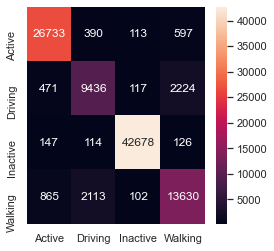

In [27]:
fig, ax = plt.subplots(figsize=(4,4)) 
sns.heatmap(cf,annot=True,fmt='g',ax=ax,xticklabels=['Active','Driving','Inactive','Walking'],yticklabels=['Active','Driving','Inactive','Walking'])

In [28]:
print('\nClassification Report\n')
print(classification_report(TSNEy_test, rf_model_preds, target_names=['Active','Driving','Inactive','Walking']))


Classification Report

              precision    recall  f1-score   support

      Active       0.95      0.96      0.95     27833
     Driving       0.78      0.77      0.78     12248
    Inactive       0.99      0.99      0.99     43065
     Walking       0.82      0.82      0.82     16710

    accuracy                           0.93     99856
   macro avg       0.89      0.88      0.89     99856
weighted avg       0.93      0.93      0.93     99856



<h3>KNN PCA

In [34]:
knn_model = KNeighborsClassifier()

In [44]:
knn_model.fit(PCAX_train,PCAy_train)

KNeighborsClassifier()

In [45]:
knn_model_preds = knn_model.predict(PCAX_test)

In [46]:
knn_model_accuracy = accuracy_score(PCAy_test,knn_model_preds)

In [47]:
knn_model_accuracy

0.8654262137477968

In [51]:
cf = confusion_matrix(PCAy_test,pd.Series(knn_model_preds),labels=['Active','Driving','Inactive','Walking'])

matplotlib.colorbar:DEBUG:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001459232E8E0>
matplotlib.colorbar:DEBUG:Using auto colorbar locator on colorbar
matplotlib.colorbar:DEBUG:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001459232E8E0>
matplotlib.colorbar:DEBUG:Setting pcolormesh


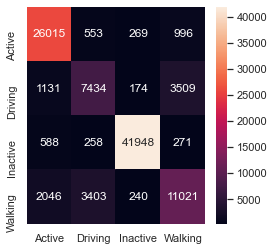

In [52]:
fig, ax = plt.subplots(figsize=(4,4)) 
sns.heatmap(cf,annot=True,fmt='g',ax=ax,xticklabels=['Active','Driving','Inactive','Walking'],yticklabels=['Active','Driving','Inactive','Walking'])

In [53]:
print('\nClassification Report\n')
print(classification_report(PCAy_test, knn_model_preds, target_names=['Active','Driving','Inactive','Walking']))


Classification Report

              precision    recall  f1-score   support

      Active       0.87      0.93      0.90     27833
     Driving       0.64      0.61      0.62     12248
    Inactive       0.98      0.97      0.98     43065
     Walking       0.70      0.66      0.68     16710

    accuracy                           0.87     99856
   macro avg       0.80      0.79      0.80     99856
weighted avg       0.86      0.87      0.86     99856



<h3>KNN TSNE

In [55]:
knn_model = KNeighborsClassifier()

In [56]:
knn_model.fit(TSNEX_train,TSNEy_train)

KNeighborsClassifier()

In [57]:
knn_model_preds = knn_model.predict(TSNEX_test)

In [58]:
knn_model_accuracy = accuracy_score(TSNEy_test,knn_model_preds)

In [59]:
knn_model_accuracy

0.9203953693318379

In [60]:
cf = confusion_matrix(TSNEy_test,pd.Series(knn_model_preds),labels=['Active','Driving','Inactive','Walking'])

matplotlib.colorbar:DEBUG:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001459257A4C0>
matplotlib.colorbar:DEBUG:Using auto colorbar locator on colorbar
matplotlib.colorbar:DEBUG:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001459257A4C0>
matplotlib.colorbar:DEBUG:Setting pcolormesh


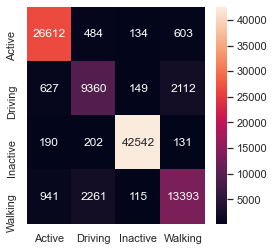

In [61]:
fig, ax = plt.subplots(figsize=(4,4)) 
sns.heatmap(cf,annot=True,fmt='g',ax=ax,xticklabels=['Active','Driving','Inactive','Walking'],yticklabels=['Active','Driving','Inactive','Walking'])

In [62]:
print('\nClassification Report\n')
print(classification_report(TSNEy_test, knn_model_preds, target_names=['Active','Driving','Inactive','Walking']))


Classification Report

              precision    recall  f1-score   support

      Active       0.94      0.96      0.95     27833
     Driving       0.76      0.76      0.76     12248
    Inactive       0.99      0.99      0.99     43065
     Walking       0.82      0.80      0.81     16710

    accuracy                           0.92     99856
   macro avg       0.88      0.88      0.88     99856
weighted avg       0.92      0.92      0.92     99856



<h3>SVM PCA

In [66]:
svm_model = SVC(random_state=RANDOM_SEED)

In [67]:
svm_model.fit(PCAX_train,PCAy_train)

SVC(random_state=42)

In [68]:
svm_model_preds = svm_model.predict(PCAX_test)

In [69]:
svm_model_accuracy = accuracy_score(PCAy_test,svm_model_preds)

In [70]:
svm_model_accuracy

0.5148614004165999

In [71]:
cf = confusion_matrix(PCAy_test,pd.Series(svm_model_preds),labels=['Active','Driving','Inactive','Walking'])

matplotlib.colorbar:DEBUG:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000145942306D0>
matplotlib.colorbar:DEBUG:Using auto colorbar locator on colorbar
matplotlib.colorbar:DEBUG:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000145942306D0>
matplotlib.colorbar:DEBUG:Setting pcolormesh


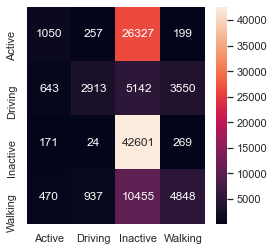

In [72]:
fig, ax = plt.subplots(figsize=(4,4)) 
sns.heatmap(cf,annot=True,fmt='g',ax=ax,xticklabels=['Active','Driving','Inactive','Walking'],yticklabels=['Active','Driving','Inactive','Walking'])

In [73]:
print('\nClassification Report\n')
print(classification_report(PCAy_test, svm_model_preds, target_names=['Active','Driving','Inactive','Walking']))


Classification Report

              precision    recall  f1-score   support

      Active       0.45      0.04      0.07     27833
     Driving       0.71      0.24      0.36     12248
    Inactive       0.50      0.99      0.67     43065
     Walking       0.55      0.29      0.38     16710

    accuracy                           0.51     99856
   macro avg       0.55      0.39      0.37     99856
weighted avg       0.52      0.51      0.41     99856



<h3>KNN TSNE

In [74]:
svm_model = SVC(random_state=RANDOM_SEED)

In [75]:
svm_model.fit(TSNEX_train,TSNEy_train)

SVC(random_state=42)

In [76]:
svm_model_preds = svm_model.predict(TSNEX_test)

In [77]:
svm_model_accuracy = accuracy_score(TSNEy_test,svm_model_preds)

In [78]:
svm_model_accuracy

0.4821242589328633

In [79]:
cf = confusion_matrix(TSNEy_test,pd.Series(svm_model_preds),labels=['Active','Driving','Inactive','Walking'])

matplotlib.colorbar:DEBUG:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000145942D83A0>
matplotlib.colorbar:DEBUG:Using auto colorbar locator on colorbar
matplotlib.colorbar:DEBUG:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000145942D83A0>
matplotlib.colorbar:DEBUG:Setting pcolormesh


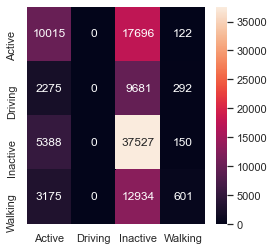

In [80]:
fig, ax = plt.subplots(figsize=(4,4)) 
sns.heatmap(cf,annot=True,fmt='g',ax=ax,xticklabels=['Active','Driving','Inactive','Walking'],yticklabels=['Active','Driving','Inactive','Walking'])

In [81]:
print('\nClassification Report\n')
print(classification_report(TSNEy_test, svm_model_preds, target_names=['Active','Driving','Inactive','Walking']))


Classification Report

              precision    recall  f1-score   support

      Active       0.48      0.36      0.41     27833
     Driving       0.00      0.00      0.00     12248
    Inactive       0.48      0.87      0.62     43065
     Walking       0.52      0.04      0.07     16710

    accuracy                           0.48     99856
   macro avg       0.37      0.32      0.27     99856
weighted avg       0.43      0.48      0.39     99856

